# STORE SALES AND PROFIT ANALYSIS

In [129]:
#importing packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline


In [81]:
#reading the data
data=pd.read_csv('C:/Users/pc/Desktop/pydata/Superstore.csv',encoding='latin-1')
print(data.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [73]:
#Descriptive statistics of the dataset
print(data.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [84]:
#setting columns to dates for analysis
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

data['Order Month']=data['Order Date'].dt.month
data['Order Year']=data['Order Date'].dt.year
data['Order Day of Week']=data['Order Date'].dt.dayofweek

In [131]:
#Calculating sales by month
sales_per_month=data.groupby('Order Month')['Sales'].sum()
sales_per_month

Order Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

Text(0.0, 1.0, 'Sales per Month')

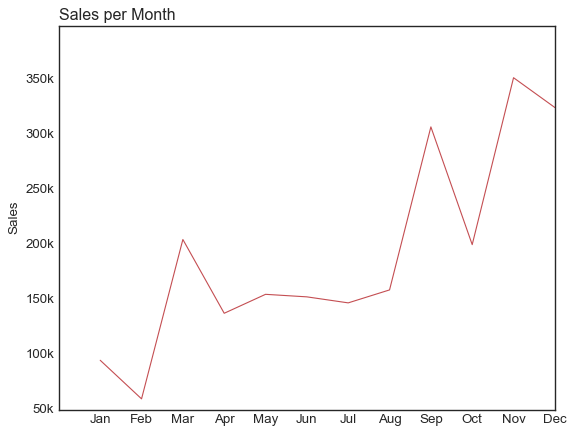

In [284]:
#plotting sales per month using simple plot graph
#per graph, November had the highest sales per month
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_axis_ticks=[50000,100000,150000,200000,250000,300000,350000] #existing ticks on sales axis (y-axis)
ylabel=['50k','100k','150k','200k','250k','300k','350k'] #setting ticks on sales axis (y-axis)
plt.plot(sales_per_month,'-r')
plt.xticks(range(1,13),months)
plt.yticks(y_axis_ticks,labels=ylabel)
plt.ylabel('Sales')
plt.title('Sales per Month',loc='left')

In [137]:
#calculating sales per category
sales_per_category=data.groupby('Category')['Sales'].sum()
sales_per_category

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

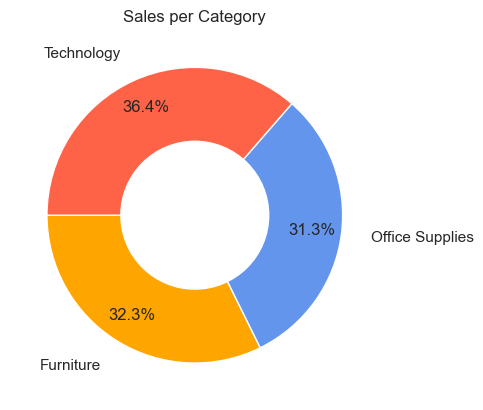

In [197]:
#plotting sales per category using a donut graph
#Technology topped the category with most sales
plt.pie(sales_per_category.values,startangle=180,autopct='%0.1f%%',
        labels=sales_per_category.index,colors=['orange','cornflowerblue','tomato'],labeldistance=1.2,pctdistance=0.8)
hole=plt.Circle((0,0),0.5,facecolor='white')
plt.title('Sales per Category')
plt.gcf().gca().add_artist(hole)
plt.show()

In [203]:
#Finding sales per sub-category
subcategory_sales=data.groupby('Sub-Category')['Sales'].sum()
subcategory_sales

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_8948\3388536353.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


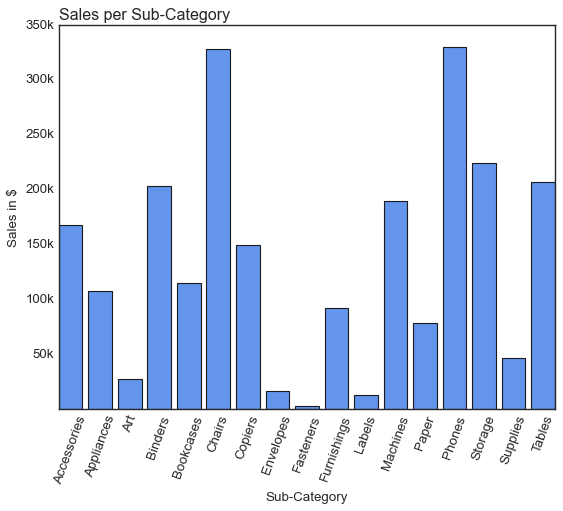

In [283]:
#plotting sales per sub-category
#phones topped the list with chairs being the second highest among the list.
plt.style.use('seaborn-white')
plt.bar(subcategory_sales.index,subcategory_sales.values,color='cornflowerblue')
plt.title('Sales per Sub-Category',loc='left')
plt.ylabel('Sales in $')
plt.xlabel('Sub-Category')
plt.xticks(rotation=70)
plt.yticks(y_axis_ticks,labels=ylabel)
plt.yticks()
plt.show()

(8000.0, 45000.0)

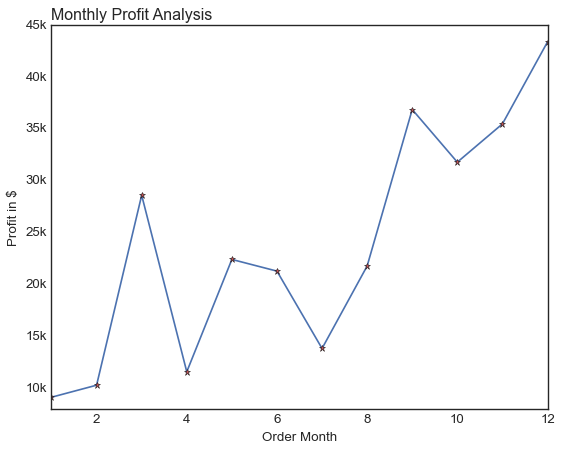

In [282]:
#Profit per month analysis
#December was the month with the most/highest profit
yyy=['10k','15k','20k','25k','30k','35k','40k','45k'] #for y-ticks
yy=[10000,15000,20000,25000,30000,35000,40000,45000]

profit_per_month=data.groupby('Order Month')['Profit'].sum()
plt.plot(profit_per_month.index,profit_per_month.values,'*-',markerfacecolor='r',linewidth=1.5)
plt.xlabel('Order Month')
plt.ylabel('Profit in $')
plt.yticks(yy,yyy)
plt.title('Monthly Profit Analysis',loc='left')
plt.xlim(1,12)
plt.ylim(8000,45000)



In [286]:
#profit per category
profit_per_category=data.groupby('Category')['Profit'].sum()
profit_per_category

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

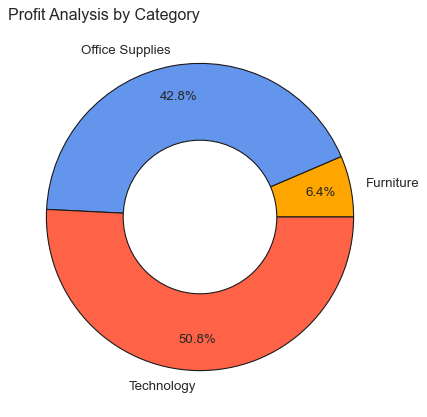

In [306]:
#plotting profit per category
#technology had the highest profit among the category of items
plt.pie(profit_per_category.values,labels=profit_per_category.index,colors=['orange','cornflowerblue','tomato']
        ,autopct='%0.1f%%',pctdistance=.8,)
hole2=plt.Circle((0,0),radius=0.5,facecolor='white')
plt.title('Profit Analysis by Category',loc='left')
plt.gcf().gca().add_artist(hole2)
plt.show()

In [309]:
#profit by sub-category
profit_by_subcategory=data.groupby('Sub-Category')['Profit'].sum()
profit_by_subcategory

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

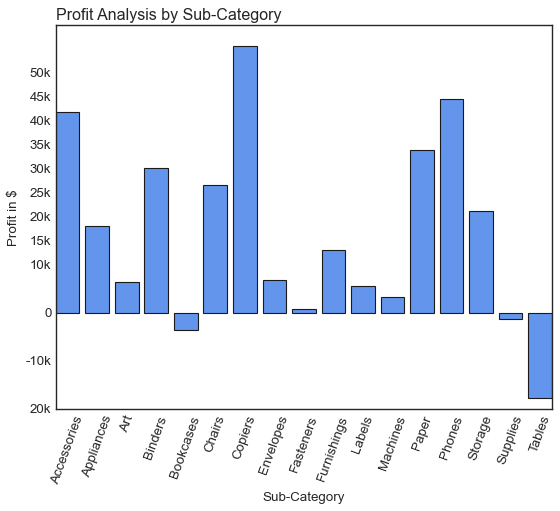

In [322]:
#plotting profit by sub-category
#with regards to sub-category, 3 categories made losses ie. bookcases, supplies and tables. 
#The most profit was made by copiers

plt.bar(profit_by_subcategory.index,profit_by_subcategory.values,color='cornflowerblue')
plt.xticks(rotation=70)
yyy=['20k','-10k',0,'10k','15k','20k','25k','30k','35k','40k','45k','50k']
yy=[-20000,-10000,0,10000,15000,20000,25000,30000,35000,40000,45000,50000]
plt.xlabel('Sub-Category')
plt.ylabel('Profit in $')
plt.title('Profit Analysis by Sub-Category',loc='left')
plt.yticks(yy,yyy)
plt.show()

In [324]:
#calculating profit and sales by segment
profit_per_seg,sales_per_seg=data.groupby('Segment')['Profit'].sum(),data.groupby('Segment')['Sales'].sum()

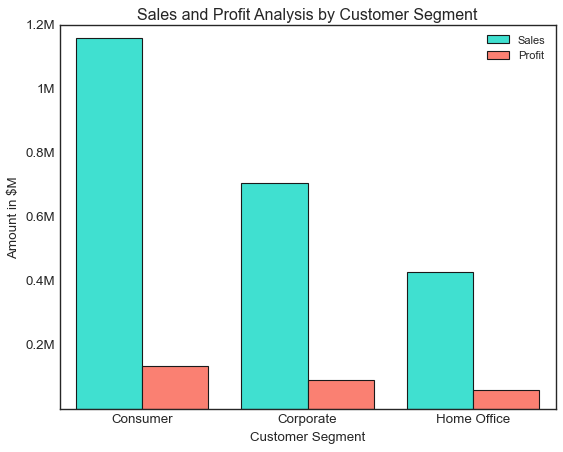

In [381]:
#plotting sales and profit by customer segment
seg=np.arange(0,3)
plt.bar(seg-0.2,sales_per_seg.values,width=0.4,color='turquoise',label='Sales')
plt.bar(seg+0.2,profit_per_seg.values,width=0.4,color='salmon',label='Profit')
plt.xticks(seg,sales_per_seg.index)
plt.xlabel('Customer Segment')
plt.yticks(np.arange(200000,1400000,200000),['0.2M','0.4M','0.6M','0.8M','1M','1.2M'])
plt.ylabel('Amount in $M')
plt.title('Sales and Profit Analysis by Customer Segment')
plt.legend(loc='upper right',fontsize='small')
plt.show()

In [387]:
#grouping profit and sales data
data.groupby('Segment')['Profit']
data.groupby('Segment')['Sales']

In [396]:
#finding sales per proft ratio
#Consumer goods had the highest sales per profit ratio
sales_per_seg/profit_per_seg

Segment
Consumer       8.659471
Corporate      7.677245
Home Office    7.125416
dtype: float64